In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import scipy.linalg
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [3]:
import sys
sys.path.append('../')
# import model
from model.UnicycleModel import UnicycleModel
from cost.UnicycleCost import UnicycleCost
from iLQR import iLQR
from scipy.integrate import solve_ivp

In [5]:
xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

ix = 3
iu = 2
N = 30
tf = 3
delT = tf/N
myModel = UnicycleModel('Hello',ix,iu,linearization="numeric_central")
myCost = UnicycleCost('Hello',xf,N)

In [6]:
maxIter= 100

x0 = np.zeros(3)
x0[0] = -2.0
x0[1] = -2.0
x0[2] = 0

u0 = np.random.rand(N,iu)
i1 = iLQR('unicycle',delT,N,tf,maxIter,myModel,myCost,discretization="ACL")
xbar, ubar, Quu_save, Quu_inv_save, L, l = i1.update(x0,u0)

iteration   cost        reduction   expected    gradient    log10(lambda)
0           2.19557e+07 1.68e+07    1.1e+07     7.54        0.0         
1           5.18334e+06 3.8e+06     2.59e+06    1.11        -0.2        
2           1.38068e+06 1.03e+06    6.9e+05     0.644       -0.6        
3           348078      2.62e+05    1.74e+05    0.321       -1.2        
4           86288.4     6.48e+04    4.31e+04    0.159       -2.0        
5           21513       1.6e+04     1.07e+04    0.0856      -3.1        
6           5472.66     4e+03       2.67e+03    0.0529      -4.3        
7           1473.85     1e+03       666         0.0353      -5.7        
8           474.15      250         167         0.0173      -7.3        
9           224.368     62.4        41.6        0.0085      -inf        
10          161.932     15.6        10.4        0.00428     -inf        


/Users/taewankim/Documents/Code/Personal/iLQR/notebooks/../iLQR.py:324: RuntimeWarning: divide by zero encountered in log10
  print("%-12d%-12.6g%-12.3g%-12.3g%-12.3g%-12.1f" % ( iteration,np.sum(self.c),dcost,expected,g_norm,np.log10(self.lamda)) )


11          146.325     3.9         2.6         0.00221     -inf        
12          142.424     0.976       0.651       0.00135     -inf        
13          141.448     0.244       0.163       0.000639    -inf        
14          141.204     0.191       0.177       0.0186      -inf        
15          141.013     0.0318      0.103       0.0137      -inf        
16          140.982     0.176       0.117       0.00965     -inf        
17          140.806     0.0442      0.0294      0.00421     -inf        
18          140.762     0.0113      0.00748     0.00199     -inf        
19          140.75      0.00292     0.00193     0.000977    -inf        
20          140.748     0.000768    0.000506    0.000489    -inf        
21          140.747     0.000205    0.000135    0.000248    -inf        
22          140.747     5.55e-05    3.64e-05    0.000127    -inf        
SUCCEESS : gradient norm < tolGrad


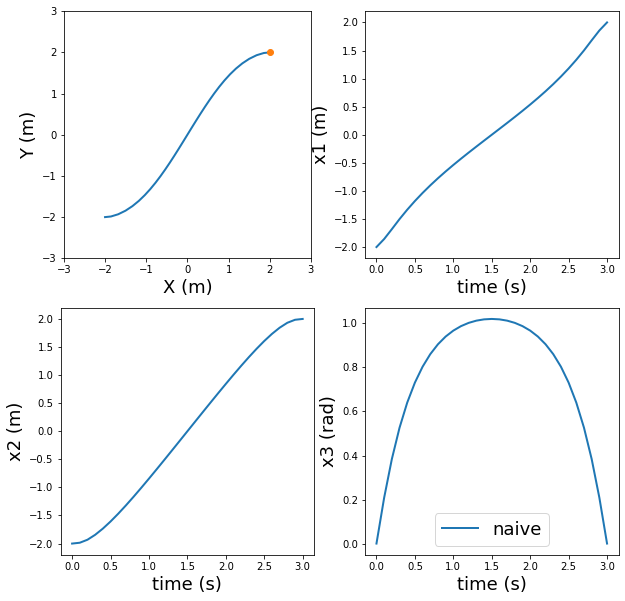

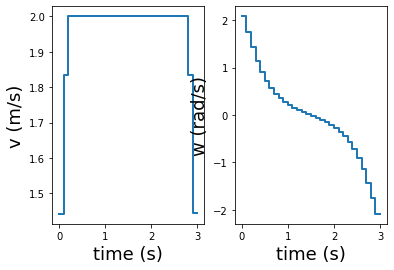

In [7]:
t_index = np.array(range(N+1))*delT

plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(xbar[:,0], xbar[:,1],'-', linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(t_index, xbar[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(t_index, xbar[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(t_index, xbar[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.step(t_index, [*ubar[:N,0],ubar[N-1,0]],alpha=1.0,where='post',linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.step(t_index, [*ubar[:N,1],ubar[N-1,1]],alpha=1.0,where='post',linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()